### Gradient descent understanding


In [35]:
'''import math
import seaborn as seabornInstance
import matplotlib.pyplot as plot

def sigmoid(x):
    return (1/(1 + (math.exp(-x))))

data = list(range(-10,10))
data_out = [sigmoid(i) for i in data]
plot.figure(figsize=(15,10))
seabornInstance.lineplot(x=data, y=data_out)
'''

'import math\nimport seaborn as seabornInstance\nimport matplotlib.pyplot as plot\n\ndef sigmoid(x):\n    return (1/(1 + (math.exp(-x))))\n\ndata = list(range(-10,10))\ndata_out = [sigmoid(i) for i in data]\nplot.figure(figsize=(15,10))\nseabornInstance.lineplot(x=data, y=data_out)\n'

In [13]:
import pandas as pd
import numpy as np
import seaborn as seabornInstance
import matplotlib.pyplot as plot
import math
from sklearn.linear_model import LogisticRegression


In [14]:
data = pd.read_csv('ex2data1.txt', header=None, names=['exam1', 'exam2', 'result'])
data.describe()

,exam1,exam2,result
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<Figure size 720x1080 with 0 Axes>

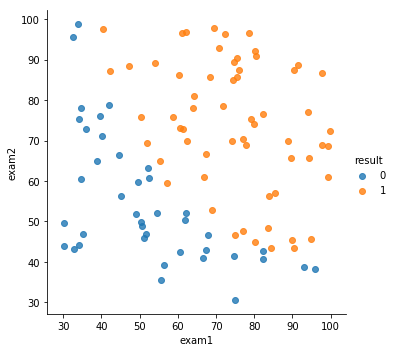

In [15]:
plot.figure(figsize=(10,15))
seabornInstance.lmplot(x='exam1', y='exam2', data=data, fit_reg=False, hue='result')

In [209]:
data['default'] = 1

In [233]:
X_mat = np.array(data[['default','exam1','exam2']])
Y_mat = np.array(data['result'])
Theta = np.ones(X_mat.shape[1]).reshape(X_mat.shape[1],1)
rate = 0.00003
num_iteration = 100000

In [234]:

def logestic_hypothesis(Theta, X):
    return(1 / (np.exp(-1 * np.dot(X, Theta)) + 1))

def logestic_cost(Theta, X, Y):
    hx = logestic_hypothesis(Theta, X)
    return(np.sum(-1 * (np.dot(Y, np.log(hx)) + np.dot((1-Y), np.log(1-hx)))))
    
def logestinc_gredient(Theta, X, Y, rate):
    hx = logestic_hypothesis(Theta, X)
    return(Theta - (rate/X.shape[1]) * np.dot((hx.T - Y), X).T)
    #return((rate/X.shape[1]) * np.dot((hx.T - Y), X).T)


In [235]:
logestinc_gredient(Theta, X_mat, Y_mat, rate)


array([[0.9996    ],
       [0.97918708],
       [0.97815184]])

In [236]:
cost_array = []
for i in range(num_iteration):
    #print(i)
    #print(Theta)
    #print(logestic_cost(Theta, X_mat, Y_mat))
    cost = logestic_cost(Theta, X_mat, Y_mat)
    if cost > 0:
        cost_array.append(cost)
    Theta = logestinc_gredient(Theta, X_mat, Y_mat, rate)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


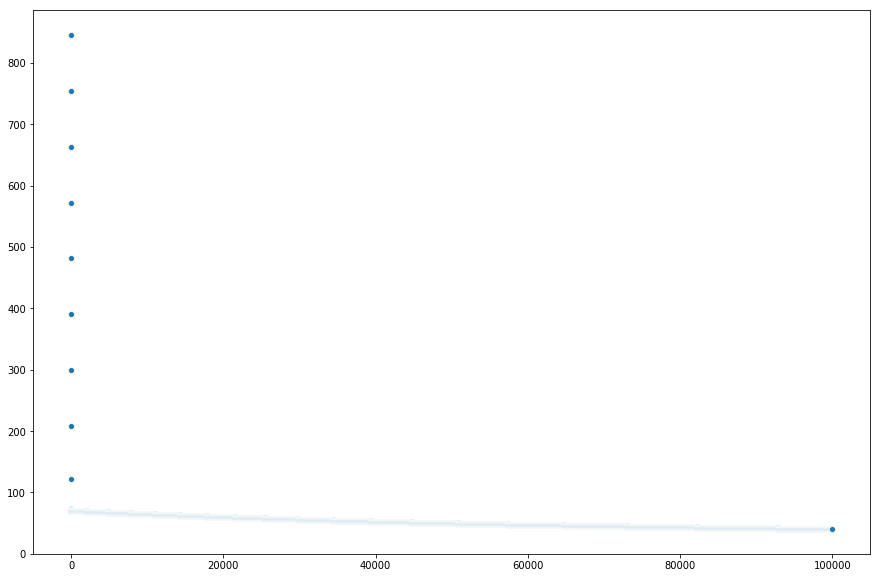

In [237]:
plot.figure(figsize=(15,10))
seabornInstance.scatterplot(x=range(len(cost_array)), y=cost_array)

In [240]:
print(logestic_hypothesis(Theta, X_mat[70]))
print(Y_mat[70])


[0.1846887]
0
